In [275]:
import numpy as np
import pandas as pd

In [276]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [277]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1324,ham,Can you call me plz. Your number shows out of ...,NaN,NaN,NaN
254,ham,"I'm back, lemme know when you're ready",NaN,NaN,NaN
252,ham,What you doing?how are you?,NaN,NaN,NaN
4542,ham,I've been trying to reach him without success,NaN,NaN,NaN
227,ham,Hey company elama po mudyadhu.,NaN,NaN,NaN


In [278]:
#1.Data Cleaning
#2.EDA
#3.Text Preprocessing
#4.Model building
#5.Evaluation
#6.Improvement
#7.Website
#8.Deploy

### 1.Data Cleaning

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [280]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [281]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [282]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1310,ham,"I.ll always be there, even if its just in spir..."
4760,ham,It's Ì© only $140 ard...Ìä rest all ard $180 a...
3697,ham,S:)but he had some luck.2 catches put down:)
5414,ham,East coast
1093,ham,Well the weather in cali's great. But its comp...


In [283]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [284]:
df['target']=encoder.fit_transform(df['target'])

In [285]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [286]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [287]:
#check for duplicate values
df.duplicated().sum()

403

In [288]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [289]:
df.duplicated().sum()

0

In [290]:
df.shape

(5169, 2)

### 2.EDA

In [291]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [292]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

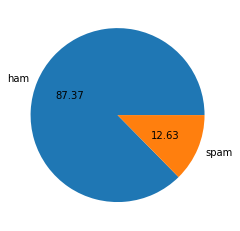

In [293]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [294]:
#Data is imbalanced

In [295]:
import nltk

In [296]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/arvindsharma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [297]:
df['num_characters']=df['text'].apply(len)

In [298]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [299]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [300]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [301]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [302]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [303]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [304]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [305]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [306]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

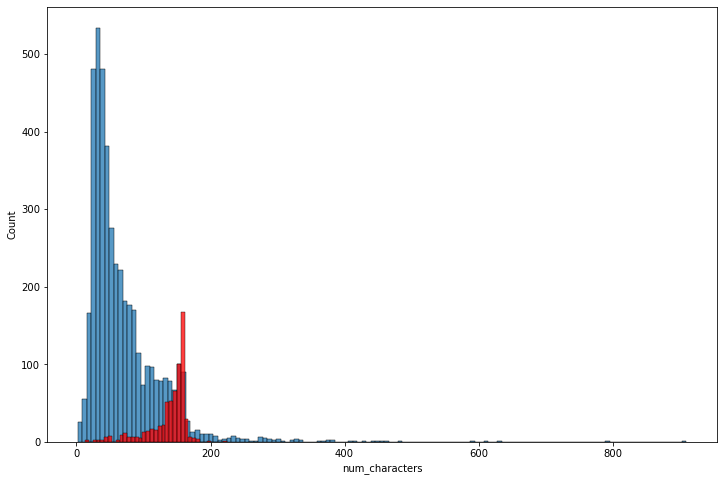

In [307]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

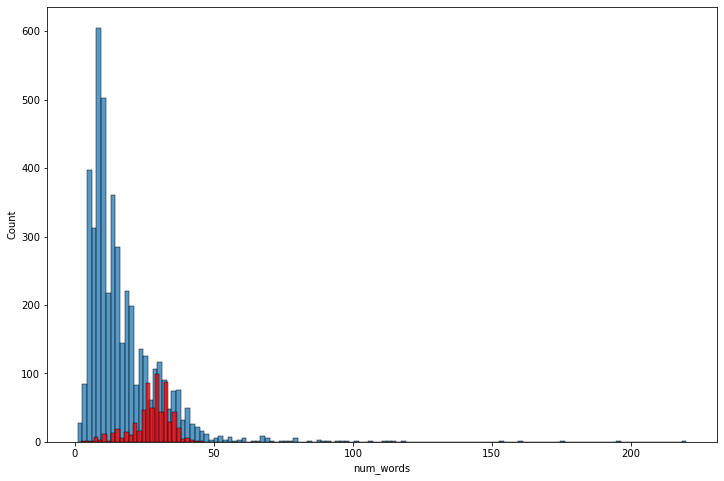

In [308]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

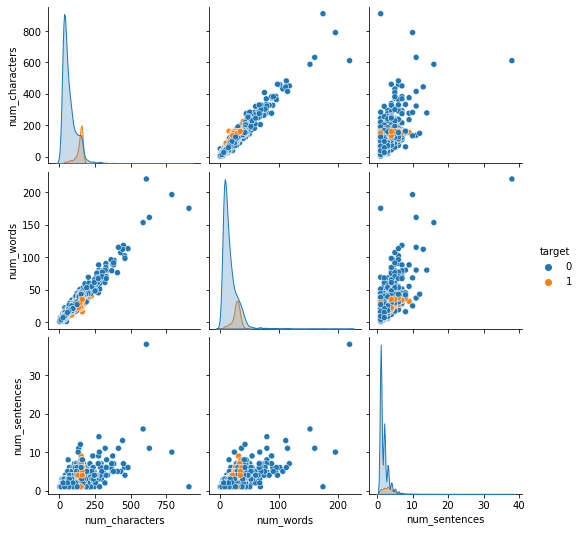

In [309]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

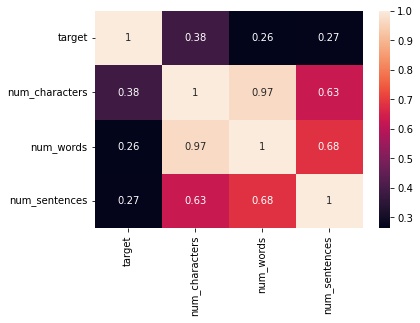

In [310]:
sns.heatmap(df.corr(),annot=True)

### 3.Data Preprocessing

In [347]:
from nltk.corpus import stopwords
import string
stops=set(stopwords.words('english'))
punctuations=list(string.punctuation)
stops.update(punctuations)

In [354]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [349]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [312]:
def remove_stopwords(text):
    no_stop = []
    for word in text.split(' '):
        if word not in stops:
            no_stop.append(word)
    return " ".join(no_stop)

In [313]:
df['transformed_text']=df['text'].apply(remove_stopwords)

In [314]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [315]:
df['transformed_text']=df['transformed_text'].apply(lambda x:x.lower())

In [316]:
df['transformed_text']=df['transformed_text'].apply(lambda x:lemmatizer.lemmatize(x))

In [317]:
df.head(10)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go jurong point, crazy.. available bugis n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor... u c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah i think goes usf, lives around though"
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darling 3 week's word back! i'd li...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak me. they treat like ai...
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,as per request 'melle melle (oru minnaminungin...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner!! as valued network customer selected r...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,had mobile 11 months more? u r entitled update...


In [318]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [319]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=''))

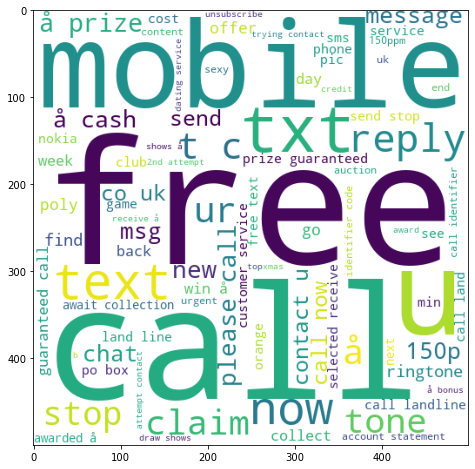

In [320]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

In [321]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=''))

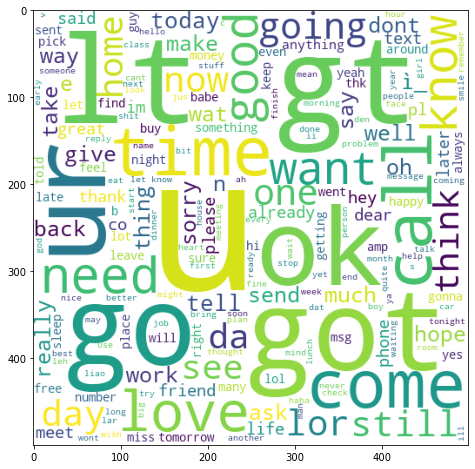

In [322]:
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)

In [323]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go jurong point, crazy.. available bugis n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor... u c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah i think goes usf, lives around though"


In [324]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [350]:
len(spam_corpus)

11753

In [326]:
spam_corpus

['free',
 'entry',
 '2',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005.',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'question(std',
 'txt',
 "rate)t&c's",
 'apply',
 "08452810075over18's",
 'freemsg',
 'hey',
 'darling',
 '3',
 "week's",
 'word',
 'back!',
 "i'd",
 'like',
 'fun',
 'still?',
 'tb',
 'ok!',
 'xxx',
 'std',
 'chgs',
 'send,',
 'å£1.50',
 'rcv',
 'winner!!',
 'as',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 'å£900',
 'prize',
 'reward!',
 'to',
 'claim',
 'call',
 '09061701461.',
 'claim',
 'code',
 'kl341.',
 'valid',
 '12',
 'hours',
 'only.',
 'had',
 'mobile',
 '11',
 'months',
 'more?',
 'u',
 'r',
 'entitled',
 'update',
 'latest',
 'colour',
 'mobiles',
 'camera',
 'free!',
 'call',
 'the',
 'mobile',
 'update',
 'co',
 'free',
 '08002986030',
 'six',
 'chances',
 'win',
 'cash!',
 'from',
 '100',
 '20,000',
 'pounds',
 'txt>',
 'csh11',
 'send',
 '87575.',
 'cost',
 '150p/day,',
 '6days,',
 '16+',
 '

/Users/arvindsharma/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


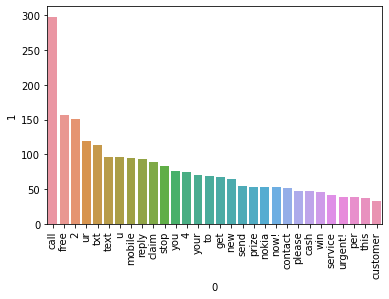

In [327]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [328]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [329]:
len(ham_corpus)

43032

/Users/arvindsharma/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


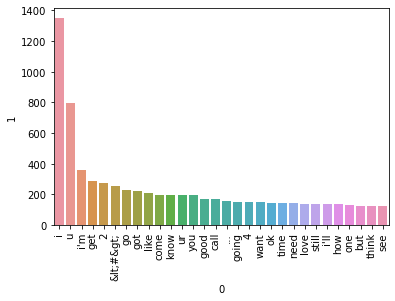

In [330]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### 4.Model building

In [331]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [332]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [333]:
X.shape

(5169, 3000)

In [334]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [335]:
from sklearn.model_selection import train_test_split

In [336]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [337]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [338]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [339]:
gnb.fit(X_train,Y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))

0.8936170212765957
[[804  92]
 [ 18 120]]
0.5660377358490566


In [340]:
mnb.fit(X_train,Y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9787234042553191
[[896   0]
 [ 22 116]]
1.0


In [341]:
bnb.fit(X_train,Y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.9845261121856866
[[894   2]
 [ 14 124]]
0.9841269841269841


In [342]:
#tfidf-mnb

In [346]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [371]:
a="congratulations you win 1000 call on this number to get your prize"
transform_sms=transform_text(a)
transform_sms

'congratul win 1000 call number get prize'

In [377]:
vector_input=tfidf.transform([transform_sms])
result=bnb.predict(vector_input)[0]
result

1